## Product Classification for Inventory Management

### Importance of Inventory Management

If your business requires maintaining an inventory, you might sometimes feel like you're walking a tightrope. Not having enough inventory means you run the risk of losing sales, while having too much inventory is costly in more ways than one. That's why having an efficient inventory control system is so important.

A solution such as a powerful image classifier can help the company track shelf inventory, categorize products, record product volume etc.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Using fastai library built upon Pytorch
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
# Downloading Dataset
!wget https://he-s3.s3.amazonaws.com/media/hackathon/deep-learning-challenge-1/identify-the-objects/a0409a00-8-dataset_dp.zip

--2017-11-12 02:05:38--  https://he-s3.s3.amazonaws.com/media/hackathon/deep-learning-challenge-1/identify-the-objects/a0409a00-8-dataset_dp.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.36.92
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.36.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 534082470 (509M) [application/zip]
Saving to: ‘a0409a00-8-dataset_dp.zip’

a0409a00-8-dataset_ 100%[===================>] 509.34M  9.46MB/s    in 59s     

2017-11-12 02:06:37 (8.65 MB/s) - ‘a0409a00-8-dataset_dp.zip’ saved [534082470/534082470]



In [5]:
!unzip a0409a00-8-dataset_dp.zip

Archive:  a0409a00-8-dataset_dp.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
   creating: test_img/
  inflating: test_img/test_1000a.png  
  inflating: test_img/test_1000b.png  
  inflating: test_img/test_1000c.png  
  inflating: test_img/test_1000d.png  
  inflating: test_img/test_1001a.png  
  inflating: test_img/test_1001b.png  
  inflating: test_img/test_1001c.png  
  inflating: test_img/test_1001d.png  
  inflating: test_img/test_1002a.png  
  inflating: test_img/test_1002b.png  
  inflating: test_img/test_1002c.png  
  inflating: test_img/test_1002d.png  
  inflating: test_img/test_1003a.png  
  inflating: test_img/test_1003b.png  
  inflating: test_img/test_1003c.png  
  inflating: test_img/test_1003d.png  
  inflating: test_img/test_1004a.png  
  inflating: test_img/test_1004b.png  
  inflating: test_img/test_1004c.png  
  inflating: test_img/test_1004d.png  
  inflating: test_img/test_1005a.png  
  inflating: test_img/test_1005b.png  
  infla

  inflating: test_img/test_1057d.png  
  inflating: test_img/test_1058a.png  
  inflating: test_img/test_1058b.png  
  inflating: test_img/test_1058c.png  
  inflating: test_img/test_1058d.png  
  inflating: test_img/test_1059a.png  
  inflating: test_img/test_1059b.png  
  inflating: test_img/test_1059c.png  
  inflating: test_img/test_1059d.png  
  inflating: test_img/test_1060a.png  
  inflating: test_img/test_1060b.png  
  inflating: test_img/test_1060c.png  
  inflating: test_img/test_1060d.png  
  inflating: test_img/test_1061a.png  
  inflating: test_img/test_1061b.png  
  inflating: test_img/test_1061c.png  
  inflating: test_img/test_1061d.png  
  inflating: test_img/test_1062a.png  
  inflating: test_img/test_1062b.png  
  inflating: test_img/test_1062c.png  
  inflating: test_img/test_1062d.png  
  inflating: test_img/test_1063a.png  
  inflating: test_img/test_1063b.png  
  inflating: test_img/test_1063c.png  
  inflating: test_img/test_1063d.png  
  inflating: test_img/tes

  inflating: test_img/test_1117d.png  
  inflating: test_img/test_1118a.png  
  inflating: test_img/test_1118b.png  
  inflating: test_img/test_1118c.png  
  inflating: test_img/test_1118d.png  
  inflating: test_img/test_1119a.png  
  inflating: test_img/test_1119b.png  
  inflating: test_img/test_1119c.png  
  inflating: test_img/test_1119d.png  
  inflating: test_img/test_1120a.png  
  inflating: test_img/test_1120b.png  
  inflating: test_img/test_1120c.png  
  inflating: test_img/test_1120d.png  
  inflating: test_img/test_1121a.png  
  inflating: test_img/test_1121b.png  
  inflating: test_img/test_1121c.png  
  inflating: test_img/test_1121d.png  
  inflating: test_img/test_1122a.png  
  inflating: test_img/test_1122b.png  
  inflating: test_img/test_1122c.png  
  inflating: test_img/test_1122d.png  
  inflating: test_img/test_1123a.png  
  inflating: test_img/test_1123b.png  
  inflating: test_img/test_1123c.png  
  inflating: test_img/test_1123d.png  
  inflating: test_img/tes

  inflating: test_img/test_1178a.png  
  inflating: test_img/test_1178b.png  
  inflating: test_img/test_1178c.png  
  inflating: test_img/test_1178d.png  
  inflating: test_img/test_1179a.png  
  inflating: test_img/test_1179b.png  
  inflating: test_img/test_1179c.png  
  inflating: test_img/test_1179d.png  
  inflating: test_img/test_1180a.png  
  inflating: test_img/test_1180b.png  
  inflating: test_img/test_1180c.png  
  inflating: test_img/test_1180d.png  
  inflating: test_img/test_1181a.png  
  inflating: test_img/test_1181b.png  
  inflating: test_img/test_1181c.png  
  inflating: test_img/test_1181d.png  
  inflating: test_img/test_1182a.png  
  inflating: test_img/test_1182b.png  
  inflating: test_img/test_1182c.png  
  inflating: test_img/test_1182d.png  
  inflating: test_img/test_1183a.png  
  inflating: test_img/test_1183b.png  
  inflating: test_img/test_1183c.png  
  inflating: test_img/test_1183d.png  
  inflating: test_img/test_1184a.png  
  inflating: test_img/tes

  inflating: test_img/test_1236c.png  
  inflating: test_img/test_1236d.png  
  inflating: test_img/test_1237a.png  
  inflating: test_img/test_1237b.png  
  inflating: test_img/test_1237c.png  
  inflating: test_img/test_1237d.png  
  inflating: test_img/test_1238a.png  
  inflating: test_img/test_1238b.png  
  inflating: test_img/test_1238c.png  
  inflating: test_img/test_1238d.png  
  inflating: test_img/test_1239a.png  
  inflating: test_img/test_1239b.png  
  inflating: test_img/test_1239c.png  
  inflating: test_img/test_1239d.png  
  inflating: test_img/test_1240a.png  
  inflating: test_img/test_1240b.png  
  inflating: test_img/test_1240c.png  
  inflating: test_img/test_1240d.png  
  inflating: test_img/test_1241a.png  
  inflating: test_img/test_1241b.png  
  inflating: test_img/test_1241c.png  
  inflating: test_img/test_1241d.png  
  inflating: test_img/test_1242a.png  
  inflating: test_img/test_1242b.png  
  inflating: test_img/test_1242c.png  
  inflating: test_img/tes

  inflating: test_img/test_1297a.png  
  inflating: test_img/test_1297b.png  
  inflating: test_img/test_1297c.png  
  inflating: test_img/test_1297d.png  
  inflating: test_img/test_1298a.png  
  inflating: test_img/test_1298b.png  
  inflating: test_img/test_1298c.png  
  inflating: test_img/test_1298d.png  
  inflating: test_img/test_1299a.png  
  inflating: test_img/test_1299b.png  
  inflating: test_img/test_1299c.png  
  inflating: test_img/test_1299d.png  
  inflating: test_img/test_1300a.png  
  inflating: test_img/test_1300b.png  
  inflating: test_img/test_1300c.png  
  inflating: test_img/test_1300d.png  
  inflating: test_img/test_1301a.png  
  inflating: test_img/test_1301b.png  
  inflating: test_img/test_1301c.png  
  inflating: test_img/test_1301d.png  
  inflating: test_img/test_1302a.png  
  inflating: test_img/test_1302b.png  
  inflating: test_img/test_1302c.png  
  inflating: test_img/test_1302d.png  
  inflating: test_img/test_1303a.png  
  inflating: test_img/tes

  inflating: test_img/test_1358c.png  
  inflating: test_img/test_1358d.png  
  inflating: test_img/test_1359a.png  
  inflating: test_img/test_1359b.png  
  inflating: test_img/test_1359c.png  
  inflating: test_img/test_1359d.png  
  inflating: test_img/test_1360a.png  
  inflating: test_img/test_1360b.png  
  inflating: test_img/test_1360c.png  
  inflating: test_img/test_1360d.png  
  inflating: test_img/test_1361a.png  
  inflating: test_img/test_1361b.png  
  inflating: test_img/test_1361c.png  
  inflating: test_img/test_1361d.png  
  inflating: test_img/test_1362a.png  
  inflating: test_img/test_1362b.png  
  inflating: test_img/test_1362c.png  
  inflating: test_img/test_1362d.png  
  inflating: test_img/test_1363a.png  
  inflating: test_img/test_1363b.png  
  inflating: test_img/test_1363c.png  
  inflating: test_img/test_1363d.png  
  inflating: test_img/test_1364a.png  
  inflating: test_img/test_1364b.png  
  inflating: test_img/test_1364c.png  
  inflating: test_img/tes

  inflating: test_img/test_1418c.png  
  inflating: test_img/test_1418d.png  
  inflating: test_img/test_1419a.png  
  inflating: test_img/test_1419b.png  
  inflating: test_img/test_1419c.png  
  inflating: test_img/test_1419d.png  
  inflating: test_img/test_1420a.png  
  inflating: test_img/test_1420b.png  
  inflating: test_img/test_1420c.png  
  inflating: test_img/test_1420d.png  
  inflating: test_img/test_1421a.png  
  inflating: test_img/test_1421b.png  
  inflating: test_img/test_1421c.png  
  inflating: test_img/test_1421d.png  
  inflating: test_img/test_1422a.png  
  inflating: test_img/test_1422b.png  
  inflating: test_img/test_1422c.png  
  inflating: test_img/test_1422d.png  
  inflating: test_img/test_1423a.png  
  inflating: test_img/test_1423b.png  
  inflating: test_img/test_1423c.png  
  inflating: test_img/test_1423d.png  
  inflating: test_img/test_1424a.png  
  inflating: test_img/test_1424b.png  
  inflating: test_img/test_1424c.png  
  inflating: test_img/tes

  inflating: train_img/train_142a.png  
  inflating: train_img/train_142b.png  
  inflating: train_img/train_142c.png  
  inflating: train_img/train_142d.png  
  inflating: train_img/train_143a.png  
  inflating: train_img/train_143b.png  
  inflating: train_img/train_143c.png  
  inflating: train_img/train_143d.png  
  inflating: train_img/train_144a.png  
  inflating: train_img/train_144b.png  
  inflating: train_img/train_144c.png  
  inflating: train_img/train_144d.png  
  inflating: train_img/train_145a.png  
  inflating: train_img/train_145b.png  
  inflating: train_img/train_145c.png  
  inflating: train_img/train_145d.png  
  inflating: train_img/train_146a.png  
  inflating: train_img/train_146b.png  
  inflating: train_img/train_146c.png  
  inflating: train_img/train_146d.png  
  inflating: train_img/train_147a.png  
  inflating: train_img/train_147b.png  
  inflating: train_img/train_147c.png  
  inflating: train_img/train_147d.png  
  inflating: train_img/train_148a.png  


  inflating: train_img/train_196c.png  
  inflating: train_img/train_196d.png  
  inflating: train_img/train_197a.png  
  inflating: train_img/train_197b.png  
  inflating: train_img/train_197c.png  
  inflating: train_img/train_197d.png  
  inflating: train_img/train_198a.png  
  inflating: train_img/train_198b.png  
  inflating: train_img/train_198c.png  
  inflating: train_img/train_198d.png  
  inflating: train_img/train_199a.png  
  inflating: train_img/train_199b.png  
  inflating: train_img/train_199c.png  
  inflating: train_img/train_199d.png  
  inflating: train_img/train_19a.png  
  inflating: train_img/train_19b.png  
  inflating: train_img/train_19c.png  
  inflating: train_img/train_19d.png  
  inflating: train_img/train_1a.png  
  inflating: train_img/train_1b.png  
  inflating: train_img/train_1c.png  
  inflating: train_img/train_1d.png  
  inflating: train_img/train_200a.png  
  inflating: train_img/train_200b.png  
  inflating: train_img/train_200c.png  
  inflating:

  inflating: train_img/train_24b.png  
  inflating: train_img/train_24c.png  
  inflating: train_img/train_24d.png  
  inflating: train_img/train_250a.png  
  inflating: train_img/train_250b.png  
  inflating: train_img/train_250c.png  
  inflating: train_img/train_250d.png  
  inflating: train_img/train_251a.png  
  inflating: train_img/train_251b.png  
  inflating: train_img/train_251c.png  
  inflating: train_img/train_251d.png  
  inflating: train_img/train_252a.png  
  inflating: train_img/train_252b.png  
  inflating: train_img/train_252c.png  
  inflating: train_img/train_252d.png  
  inflating: train_img/train_253a.png  
  inflating: train_img/train_253b.png  
  inflating: train_img/train_253c.png  
  inflating: train_img/train_253d.png  
  inflating: train_img/train_254a.png  
  inflating: train_img/train_254b.png  
  inflating: train_img/train_254c.png  
  inflating: train_img/train_254d.png  
  inflating: train_img/train_255a.png  
  inflating: train_img/train_255b.png  
  i

  inflating: train_img/train_303a.png  
  inflating: train_img/train_303b.png  
  inflating: train_img/train_303c.png  
  inflating: train_img/train_303d.png  
  inflating: train_img/train_304a.png  
  inflating: train_img/train_304b.png  
  inflating: train_img/train_304c.png  
  inflating: train_img/train_304d.png  
  inflating: train_img/train_305a.png  
  inflating: train_img/train_305b.png  
  inflating: train_img/train_305c.png  
  inflating: train_img/train_305d.png  
  inflating: train_img/train_306a.png  
  inflating: train_img/train_306b.png  
  inflating: train_img/train_306c.png  
  inflating: train_img/train_306d.png  
  inflating: train_img/train_307a.png  
  inflating: train_img/train_307b.png  
  inflating: train_img/train_307c.png  
  inflating: train_img/train_307d.png  
  inflating: train_img/train_308a.png  
  inflating: train_img/train_308b.png  
  inflating: train_img/train_308c.png  
  inflating: train_img/train_308d.png  
  inflating: train_img/train_309a.png  


  inflating: train_img/train_357b.png  
  inflating: train_img/train_357c.png  
  inflating: train_img/train_357d.png  
  inflating: train_img/train_358a.png  
  inflating: train_img/train_358b.png  
  inflating: train_img/train_358c.png  
  inflating: train_img/train_358d.png  
  inflating: train_img/train_359a.png  
  inflating: train_img/train_359b.png  
  inflating: train_img/train_359c.png  
  inflating: train_img/train_359d.png  
  inflating: train_img/train_35a.png  
  inflating: train_img/train_35b.png  
  inflating: train_img/train_35c.png  
  inflating: train_img/train_35d.png  
  inflating: train_img/train_360a.png  
  inflating: train_img/train_360b.png  
  inflating: train_img/train_360c.png  
  inflating: train_img/train_360d.png  
  inflating: train_img/train_361a.png  
  inflating: train_img/train_361b.png  
  inflating: train_img/train_361c.png  
  inflating: train_img/train_361d.png  
  inflating: train_img/train_362a.png  
  inflating: train_img/train_362b.png  
  in

  inflating: train_img/train_410b.png  
  inflating: train_img/train_410c.png  
  inflating: train_img/train_410d.png  
  inflating: train_img/train_411a.png  
  inflating: train_img/train_411b.png  
  inflating: train_img/train_411c.png  
  inflating: train_img/train_411d.png  
  inflating: train_img/train_412a.png  
  inflating: train_img/train_412b.png  
  inflating: train_img/train_412c.png  
  inflating: train_img/train_412d.png  
  inflating: train_img/train_413a.png  
  inflating: train_img/train_413b.png  
  inflating: train_img/train_413c.png  
  inflating: train_img/train_413d.png  
  inflating: train_img/train_414a.png  
  inflating: train_img/train_414b.png  
  inflating: train_img/train_414c.png  
  inflating: train_img/train_414d.png  
  inflating: train_img/train_415a.png  
  inflating: train_img/train_415b.png  
  inflating: train_img/train_415c.png  
  inflating: train_img/train_415d.png  
  inflating: train_img/train_416a.png  
  inflating: train_img/train_416b.png  


  inflating: train_img/train_464d.png  
  inflating: train_img/train_465a.png  
  inflating: train_img/train_465b.png  
  inflating: train_img/train_465c.png  
  inflating: train_img/train_465d.png  
  inflating: train_img/train_466a.png  
  inflating: train_img/train_466b.png  
  inflating: train_img/train_466c.png  
  inflating: train_img/train_466d.png  
  inflating: train_img/train_467a.png  
  inflating: train_img/train_467b.png  
  inflating: train_img/train_467c.png  
  inflating: train_img/train_467d.png  
  inflating: train_img/train_468a.png  
  inflating: train_img/train_468b.png  
  inflating: train_img/train_468c.png  
  inflating: train_img/train_468d.png  
  inflating: train_img/train_469a.png  
  inflating: train_img/train_469b.png  
  inflating: train_img/train_469c.png  
  inflating: train_img/train_469d.png  
  inflating: train_img/train_46a.png  
  inflating: train_img/train_46b.png  
  inflating: train_img/train_46c.png  
  inflating: train_img/train_46d.png  
  in

  inflating: train_img/train_516b.png  
  inflating: train_img/train_516c.png  
  inflating: train_img/train_516d.png  
  inflating: train_img/train_517a.png  
  inflating: train_img/train_517b.png  
  inflating: train_img/train_517c.png  
  inflating: train_img/train_517d.png  
  inflating: train_img/train_518a.png  
  inflating: train_img/train_518b.png  
  inflating: train_img/train_518c.png  
  inflating: train_img/train_518d.png  
  inflating: train_img/train_519a.png  
  inflating: train_img/train_519b.png  
  inflating: train_img/train_519c.png  
  inflating: train_img/train_519d.png  
  inflating: train_img/train_51a.png  
  inflating: train_img/train_51b.png  
  inflating: train_img/train_51c.png  
  inflating: train_img/train_51d.png  
  inflating: train_img/train_520a.png  
  inflating: train_img/train_520b.png  
  inflating: train_img/train_520c.png  
  inflating: train_img/train_520d.png  
  inflating: train_img/train_521a.png  
  inflating: train_img/train_521b.png  
  in

  inflating: train_img/train_569d.png  
  inflating: train_img/train_56a.png  
  inflating: train_img/train_56b.png  
  inflating: train_img/train_56c.png  
  inflating: train_img/train_56d.png  
  inflating: train_img/train_570a.png  
  inflating: train_img/train_570b.png  
  inflating: train_img/train_570c.png  
  inflating: train_img/train_570d.png  
  inflating: train_img/train_571a.png  
  inflating: train_img/train_571b.png  
  inflating: train_img/train_571c.png  
  inflating: train_img/train_571d.png  
  inflating: train_img/train_572a.png  
  inflating: train_img/train_572b.png  
  inflating: train_img/train_572c.png  
  inflating: train_img/train_572d.png  
  inflating: train_img/train_573a.png  
  inflating: train_img/train_573b.png  
  inflating: train_img/train_573c.png  
  inflating: train_img/train_573d.png  
  inflating: train_img/train_574a.png  
  inflating: train_img/train_574b.png  
  inflating: train_img/train_574c.png  
  inflating: train_img/train_574d.png  
  in

  inflating: train_img/train_621c.png  
  inflating: train_img/train_621d.png  
  inflating: train_img/train_622a.png  
  inflating: train_img/train_622b.png  
  inflating: train_img/train_622c.png  
  inflating: train_img/train_622d.png  
  inflating: train_img/train_623a.png  
  inflating: train_img/train_623b.png  
  inflating: train_img/train_623c.png  
  inflating: train_img/train_623d.png  
  inflating: train_img/train_624a.png  
  inflating: train_img/train_624b.png  
  inflating: train_img/train_624c.png  
  inflating: train_img/train_624d.png  
  inflating: train_img/train_625a.png  
  inflating: train_img/train_625b.png  
  inflating: train_img/train_625c.png  
  inflating: train_img/train_625d.png  
  inflating: train_img/train_626a.png  
  inflating: train_img/train_626b.png  
  inflating: train_img/train_626c.png  
  inflating: train_img/train_626d.png  
  inflating: train_img/train_627a.png  
  inflating: train_img/train_627b.png  
  inflating: train_img/train_627c.png  


  inflating: train_img/train_674c.png  
  inflating: train_img/train_674d.png  
  inflating: train_img/train_675a.png  
  inflating: train_img/train_675b.png  
  inflating: train_img/train_675c.png  
  inflating: train_img/train_675d.png  
  inflating: train_img/train_676a.png  
  inflating: train_img/train_676b.png  
  inflating: train_img/train_676c.png  
  inflating: train_img/train_676d.png  
  inflating: train_img/train_677a.png  
  inflating: train_img/train_677b.png  
  inflating: train_img/train_677c.png  
  inflating: train_img/train_677d.png  
  inflating: train_img/train_678a.png  
  inflating: train_img/train_678b.png  
  inflating: train_img/train_678c.png  
  inflating: train_img/train_678d.png  
  inflating: train_img/train_679a.png  
  inflating: train_img/train_679b.png  
  inflating: train_img/train_679c.png  
  inflating: train_img/train_679d.png  
  inflating: train_img/train_67a.png  
  inflating: train_img/train_67b.png  
  inflating: train_img/train_67c.png  
  i

  inflating: train_img/train_727a.png  
  inflating: train_img/train_727b.png  
  inflating: train_img/train_727c.png  
  inflating: train_img/train_727d.png  
  inflating: train_img/train_728a.png  
  inflating: train_img/train_728b.png  
  inflating: train_img/train_728c.png  
  inflating: train_img/train_728d.png  
  inflating: train_img/train_729a.png  
  inflating: train_img/train_729b.png  
  inflating: train_img/train_729c.png  
  inflating: train_img/train_729d.png  
  inflating: train_img/train_72a.png  
  inflating: train_img/train_72b.png  
  inflating: train_img/train_72c.png  
  inflating: train_img/train_72d.png  
  inflating: train_img/train_730a.png  
  inflating: train_img/train_730b.png  
  inflating: train_img/train_730c.png  
  inflating: train_img/train_730d.png  
  inflating: train_img/train_731a.png  
  inflating: train_img/train_731b.png  
  inflating: train_img/train_731c.png  
  inflating: train_img/train_731d.png  
  inflating: train_img/train_732a.png  
  in

  inflating: train_img/train_781b.png  
  inflating: train_img/train_781c.png  
  inflating: train_img/train_781d.png  
  inflating: train_img/train_782a.png  
  inflating: train_img/train_782b.png  
  inflating: train_img/train_782c.png  
  inflating: train_img/train_782d.png  
  inflating: train_img/train_783a.png  
  inflating: train_img/train_783b.png  
  inflating: train_img/train_783c.png  
  inflating: train_img/train_783d.png  
  inflating: train_img/train_784a.png  
  inflating: train_img/train_784b.png  
  inflating: train_img/train_784c.png  
  inflating: train_img/train_784d.png  
  inflating: train_img/train_785a.png  
  inflating: train_img/train_785b.png  
  inflating: train_img/train_785c.png  
  inflating: train_img/train_785d.png  
  inflating: train_img/train_786a.png  
  inflating: train_img/train_786b.png  
  inflating: train_img/train_786c.png  
  inflating: train_img/train_786d.png  
  inflating: train_img/train_787a.png  
  inflating: train_img/train_787b.png  


In [4]:
# Our main dataset directory
PATH1 = "food_data_1/"

In [5]:
# Dimensions of the image that will be used
sz=256

In [9]:
# Rearranging files

os.makedirs('food_data_1', exist_ok=True)
!mv train_img food_data_1
!mv test_img food_data_1
!mv train.csv food_data_1
!mv test.csv food_data_1
!mv sample_submission.csv food_data_1
!rm a0409a00-8-dataset_dp.zip

mv: cannot stat 'train.csv': No such file or directory
mv: cannot stat 'test.csv': No such file or directory
mv: cannot stat 'sample_submission.csv': No such file or directory
rm: cannot remove 'a0409a00-8-dataset_dp.zip': No such file or directory



### Looking at some Pictures

In [14]:
!ls {PATH1}

sample_submission-Copy1.csv  test_img	      train_img
test-Copy1.csv		     train-Copy1.csv


In [15]:
files = !ls {PATH1}/train_img | head
files

['train_100a.png',
 'train_100b.png',
 'train_100c.png',
 'train_100d.png',
 'train_101a.png',
 'train_101b.png',
 'train_101c.png',
 'train_101d.png',
 'train_102a.png',
 'train_102b.png']

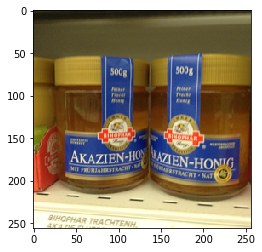

In [16]:
img = plt.imread(f'{PATH1}/train_img/{files[0]}')
plt.imshow(img);

Here is how the raw data looks like

In [17]:
img.shape

(256, 256, 3)

All the images have 256 x 256 px. So we'll use the same input dimensions. Further pre-processing - **Image resizing, Center cropping and Normalization is done**

In [18]:
img[:4,:4]

array([[[ 0.21569,  0.19608,  0.08627],
        [ 0.2    ,  0.18431,  0.07843],
        [ 0.21176,  0.19216,  0.09412],
        [ 0.20784,  0.18824,  0.08627]],

       [[ 0.21176,  0.18431,  0.09412],
        [ 0.19608,  0.17647,  0.0902 ],
        [ 0.2    ,  0.18039,  0.09804],
        [ 0.2    ,  0.18039,  0.09412]],

       [[ 0.18039,  0.15686,  0.08235],
        [ 0.17647,  0.15294,  0.08235],
        [ 0.17255,  0.14902,  0.08627],
        [ 0.17647,  0.14902,  0.08627]],

       [[ 0.13333,  0.1098 ,  0.05098],
        [ 0.14118,  0.11765,  0.06667],
        [ 0.12549,  0.10196,  0.05098],
        [ 0.12941,  0.10588,  0.0549 ]]], dtype=float32)

## Data Preparation

In [ ]:
traincsv = pd.read_csv('food_data/train.csv')
traincsv.pivot_table(index='label', aggfunc=len).sort_values('image_id', ascending=False)

In [22]:
traincsv.head()

,image_id,label
0,train_1a,rice
1,train_1b,candy
2,train_1c,jam
3,train_1d,coffee
4,train_2a,vinegar


In [21]:
testcsv = pd.read_csv('food_data_1/test.csv')

In [6]:
# Shuffling and splitting into train(80%) and validate(20%)
train_csv = f'{PATH1}/train.csv'
n = len(list(open(train_csv))) -1
val_idxs = get_cv_idxs(n)

In [7]:
# Architecture we're going to use
arch = resnet34

### Let's see the distribution

In [9]:
label_counts = traincsv.label.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

NameError: name 'traincsv' is not defined

In [12]:
size_d = {k: PIL.Image.open(PATH1+k+'.png').size for k in data.trn_ds.fnames}

In [13]:
row_sz,col_sz = list(zip(*size_d.values()))

In [14]:
row_sz=np.array(row_sz); col_sz=np.array(col_sz)

In [15]:
row_sz[:5]

array([256, 256, 256, 256, 256])

(array([    0.,     0.,     0.,     0.,     0.,  2572.,     0.,     0.,     0.,     0.]),
 array([ 255.5,  255.6,  255.7,  255.8,  255.9,  256. ,  256.1,  256.2,  256.3,  256.4,  256.5]),
 <a list of 10 Patch objects>)

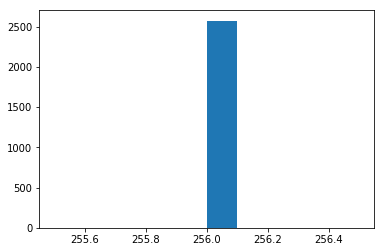

In [16]:
plt.hist(row_sz)

(array([    0.,     0.,     0.,     0.,     0.,  2572.,     0.,     0.,     0.,     0.]),
 array([ 255.5,  255.6,  255.7,  255.8,  255.9,  256. ,  256.1,  256.2,  256.3,  256.4,  256.5]),
 <a list of 10 Patch objects>)

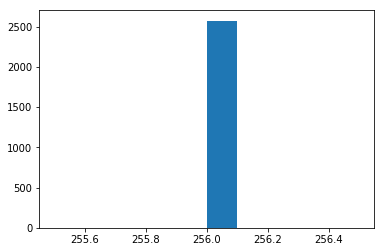

In [17]:
plt.hist(col_sz)

## Our first model - Pretrained with resnet34 arch

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks).


In [11]:
def get_data(sz, bs):
    tfms =  tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH1, 'train_img', f'{PATH1}/train.csv', test_name='test_img',
                                   val_idxs=val_idxs, tfms=tfms, num_workers=4, suffix='.png')
    return data if sz>300 else data.resize(340, 'tmp')

In [18]:
# Batch Size for each minibatch
bs = 64

In [19]:
data = get_data(sz, bs)

A Jupyter Widget

**Training 1**

In [ ]:
learning_rate = 0.01
epochs = 5
arch=resnet34
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(learning_rate, epochs)

Epoch | Training Loss | Validation Loss | Accuracy

*Note*: Precompute is the parameter which controls the evaluation of weights of the architecture we're using
If set True - the already obtained weights of the network will be used and fine tuned. These weights are also saved once calculated for future use

## Choosing a learning rate

The *learning rate* determines how quickly or how slowly you want to update the *weights* (or *parameters*). Learning rate is one of the most difficult parameters to set, because it significantly affect model performance.

**Cyclic Learning Rates**: Simply keep increasing the learning rate from a very small value, until the loss starts decreasing. We can plot the learning rate across batches to see what this looks like.


In [21]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [22]:
lrf=learn.lr_find()

A Jupyter Widget

[     0.           4.37664  29030.08008      0.05966]     



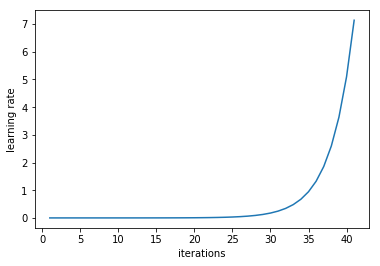

In [23]:
learn.sched.plot_lr()

For each minibatch, increase the learning rate.
Eventually the LR will be so high that lost will start getting worst.


Note that in the previous plot *iteration* is one iteration (or *minibatch*) of SGD. In one epoch there are 
(num_train_samples/num_iterations) of SGD.

We can see the plot of loss versus learning rate to see where our loss stops decreasing:

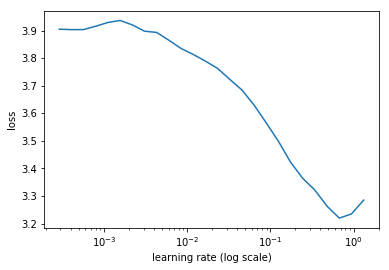

In [24]:
learn.sched.plot()

**NOTE:** Point is not the find the minimum loss but to figure out what learning rate is allowing us to decrease step rate.

The loss is still clearly improving at lr=1e-1 (0.1), so that's what we use.

Point at the lowest has too high learning rate and will perform bad when used with restarts

**Food for thought**:

No conflict between Learning Rate and Adam Optimizer:
Library figures right GD version. Tells the best learning rate to use besides ADAM.

## Improving our model

One of the common approach to improve performance is to increase the data.

### Data augmentation

If we try training for more epochs, we notice that we start to *overfit*, which means that our model is learning to recognize the specific images in the training set, rather than generalizaing such that we also get good results on the validation set. One way to fix this is to effectively create more data, through *data augmentation*. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.


> We can do this by passing `aug_tfms` (*augmentation transforms*) to `tfms_from_model`, with a list of functions to apply that randomly change the image however we wish. For photos that are largely taken from the side, we can use the pre-defined list of functions `transforms_side_on`. We can also specify random zooming of images up to specified scale by adding the `max_zoom` parameter.

In [ ]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [ ]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH1, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

Lets see how the augmented images look like

In [ ]:
ims = np.stack([get_augs() for i in range(6)])

In [ ]:
plots(ims, rows=2)

The type of image data tells what augmentation technique we can use

In [ ]:
data = ImageClassifierData.from_paths(PATH1, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [ ]:
learning_rate = 0.01
epochs = 1

In [ ]:
learn.fit(learning_rate, epochs)

In [26]:
learn.precompute=False

By default when we create a learner, it sets all but the last layer to *frozen*. That means that it's still only updating the weights in the last layer when we call `fit`.

In [27]:
learn.fit(1e-2, 5, cycle_len=1)

A Jupyter Widget

[ 0.       0.82364  1.27108  0.62453]                     
[ 1.       1.15082  1.20908  0.64299]                     
[ 2.       1.23565  1.16175  0.64583]                     
[ 3.       1.20174  1.12137  0.66004]                     
[ 4.       1.18468  1.06178  0.68703]                     



What is that `cycle_len` parameter? What we've done here is used a technique called *stochastic gradient descent with restarts (SGDR)*, a variant of *learning rate annealing*, which gradually decreases the learning rate as training progresses. This is helpful because as we get closer to the optimal weights, we want to take smaller steps.

Idea of decreasing learning rate during subsequent iterations is called annealing
The number of epochs between resetting the learning rate is set by `cycle_len`, and the number of times this happens is refered to as the *number of cycles*, and is what we're actually passing as the 2nd parameter to `fit()`. So here's what our actual learning rates looked like:

In [ ]:
learn.sched.plot_lr()

In [ ]:
learn.save('224_lastlayer')

In [ ]:
learn.load('224_lastlayer')

### Increase Size of Input Images

Will definitely prevent overfitting, If I did that by mistake. They are conceptually the same images but of different sizes.

In [28]:
learn.set_data(get_data(300, bs))
learn.freeze()

A Jupyter Widget


100%|██████████| 28/28 [00:17<00:00,  1.56it/s]


`learn.freeze()` freezes all the layers except output for backpropagating the error

In [29]:
learn.fit(1e-2, 3, cycle_len=1)

A Jupyter Widget

[ 0.       0.64832  1.0363   0.68561]                     
[ 1.       0.87689  0.99467  0.69413]                     
[ 2.       0.95916  0.95025  0.7197 ]                     



In [31]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.55014  0.9365   0.72538]                      
[ 1.       0.76597  0.89496  0.73106]                      
[ 2.       0.82623  0.89023  0.72964]                      
[ 3.       0.86705  0.85771  0.77415]                      
[ 4.       0.84889  0.84725  0.77273]                      
[ 5.       0.8393   0.84192  0.73816]                      
[ 6.       0.77753  0.83029  0.75095]                      



### Fine-tuning and differential learning rate annealing

In [32]:
learn.unfreeze()

Note that the other layers have *already* been trained to recognize imagenet photos (whereas our final layers where randomly initialized), so we want to be careful of not destroying the carefully tuned weights that are already there.

Generally speaking, the earlier layers (as we've seen) have more general-purpose features. Therefore we would expect them to need less fine-tuning for new datasets. For this reason we will use different learning rates for different layers: the first few layers will be at 1e-4, the middle layers at 1e-3, and our FC layers we'll leave at 1e-2 as before.

In [33]:
lr=np.array([1e-4,1e-3,1e-2])

In [34]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.59731  0.87563  0.73674]                     
[ 1.       0.67546  0.74945  0.77367]                      
[ 2.       0.56783  0.73074  0.7822 ]                      
[ 3.       0.52592  0.66291  0.79924]                      
[ 4.       0.42023  0.60396  0.83097]                      
[ 5.       0.3513   0.58805  0.83665]                      
[ 6.       0.30419  0.58719  0.83239]                      



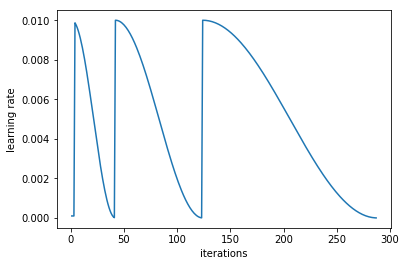

In [35]:
learn.sched.plot_lr()

In [ ]:
learn.save('224_all')

In [ ]:
learn.load('224_all')

## Analyzing results

### Confusion matrix 

In [38]:
log_preds,y = learn.TTA()
accuracy(log_preds,y)

0.8289269051321928

In [39]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

A common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[10  0  0  1  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2  0  0]
 [ 0 15  0  1  0  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  2  0  1  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0]
 [ 0  0  2 25  0  0  0  0  0  1  0  0  0  0  2  0  2  2  0  0  0  0  0  0  0]
 [ 0  0  2  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 35  1  0  0  0  0  0  0  0  1  0  0  1  0  0  0  2  0  0  0]
 [ 0  0  0  0  1  4 32  0  0  0  0  0  0  1  0  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0 15  0  0  0  0  0  0  0  2  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 29  0  1  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  1  0  0  0  0  0  1  0  0 27  1  0  0  0  0  0  0  0

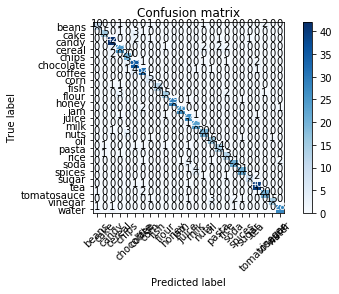

In [41]:
plot_confusion_matrix(cm, data.classes)